In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

In [2]:
data = load_data("marks.txt", None)

In [3]:
print(data)

            0          1  2
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]


In [4]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]
    

In [7]:

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

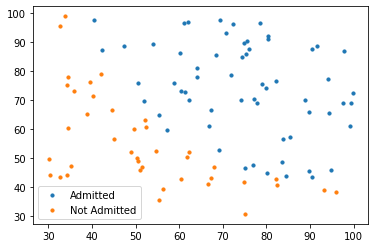

In [8]:
# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [9]:

# split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [10]:

# create model
from sklearn.linear_model import LogisticRegression

modelSKL = LogisticRegression(C=1e20)


In [11]:
# train model
modelSKL.fit(x_train,y_train)

print(modelSKL.intercept_, modelSKL.coef_)

[-24.18223853] [[0.19162887 0.19514148]]


In [12]:

# predict on X
preds = modelSKL.predict(x_test)

print(preds)

[0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0]


In [14]:
#

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.71      0.83        14

    accuracy                           0.84        25
   macro avg       0.87      0.86      0.84        25
weighted avg       0.88      0.84      0.84        25



In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, preds)
print(cm)

[[11  0]
 [ 4 10]]


In [16]:

# train the algorithm: linear kernel
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', degree=8)  
svclassifier.fit(x_train, y_train)  

SVC(degree=8, kernel='linear')

In [17]:

# predict
y_predSVM = svclassifier.predict(x_test)  

In [18]:

print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



In [21]:

cm = metrics.confusion_matrix(y_test, y_predSVM)
print(cm)

[[11  0]
 [ 3 11]]
